# Table of Contents
 <p><div class="lev1"><a href="#PyDataAnalysis-Introduction"><span class="toc-item-num">1&nbsp;&nbsp;</span>PyDataAnalysis Introduction</a></div><div class="lev2"><a href="#Data-Preparation"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preparation</a></div><div class="lev2"><a href="#Widget"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Widget</a></div><div class="lev2"><a href="#Conclusion"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></div>

# PyDataAnalysis Introduction

The idea of PyDataAnalysis library is to offer a set of functionalities to help
the Data Analysts in their work.

Initially is just a small set of simple functionalities like convert a dataframe
in a crostab dataframe using some specifics fields.

Other interesting functionality is offer a jupyter widget to offer interactive 
options to handle the data with graphical and tabular outputs.

To import the Data Analysis Jupyter Widget just use the following code:

```python
from PyDataAnalysis.widgets import DataAnalysisWidget
```

In [1]:
from PyDataAnalysis.widgets import DataAnalysisWidget
from sklearn import datasets
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use('ggplot')
%matplotlib notebook

## Data Preparation

In [2]:
dataset = datasets.load_iris()
data = pd.DataFrame(dataset.data, columns=dataset.feature_names)
data['class'] = dataset.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


With *DataAnalysisWidget* class, you can read a *pandas.DataFrame* or read a csv
from specific file path:

```python
daw = DataAnalysisWidget(data)
```

or

```python
daw = DataAnalysisWidget.load(file_path)
```

summary method can be used to return some interesting information from the data:

```python
daw.summary()
```

In [3]:
daw = DataAnalysisWidget(data)
daw.summary()

,Types,Set Values,# Observations,# NaN
sepal length (cm),float64,"[4.2999999999999998, 4.4000000000000004, 4.5, ...",150,0
sepal width (cm),float64,"[2.0, 2.2000000000000002, 2.2999999999999998, ...",150,0
petal length (cm),float64,"[1.0, 1.1000000000000001, 1.2, 1.3, 1.39999999...",150,0
petal width (cm),float64,"[0.10000000000000001, 0.20000000000000001, 0.2...",150,0
class,int64,"[0.0, 1.0, 2.0]",150,0


If you need to convert some feature to categorical type, you can use prepare_data
method with a dictionary with the name of the feature as a key and a dictionary
with with old value and new value, such as:

```python
daw.prepare_data({
    'field_name1': {'old_value1': 'new_value1', 'old_value2': 'new_value2'},
    'field_name2': {'old_value1': 'new_value1', 'old_value2': 'new_value2'}
})
```

In [4]:
daw.prepare_data({
    'class': {old: new for old, new in enumerate(dataset.target_names)}
})
daw.summary()

,Types,Set Values,# Observations,# NaN
sepal length (cm),float64,"[4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, ...",150,0
sepal width (cm),float64,"[2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, ...",150,0
petal length (cm),float64,"[1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, ...",150,0
petal width (cm),float64,"[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, ...",150,0
class,category,"['setosa', 'versicolor', 'virginica']",150,0


## Widget

You can use the show_chart method to change some parameters of the chart that 
show information of a cross tab of the fields selected:
    
```python
daw.show_chart(
    field_reference='field_of_reference',
    fields_comparison=['field1']
)
```

This method will use the parameters informed and create and show a chart and 
a data table.

<IPython.core.display.Javascript object>


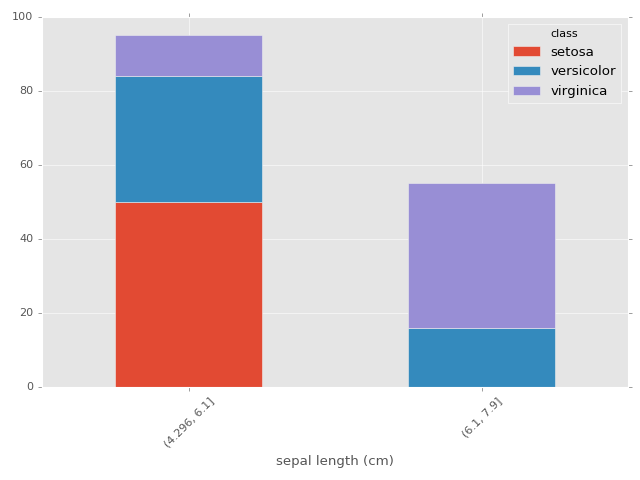

class,setosa,versicolor,virginica
sepal length (cm),,,
"(4.296, 6.1]",50,34,11
"(6.1, 7.9]",0,16,39


In [5]:
daw.show_chart(
    field_reference='class',
    fields_comparison=['sepal length (cm)']
)

## Conclusion

These are an initial functionalities to help handle and observe data phenomenons
in a very quick way.